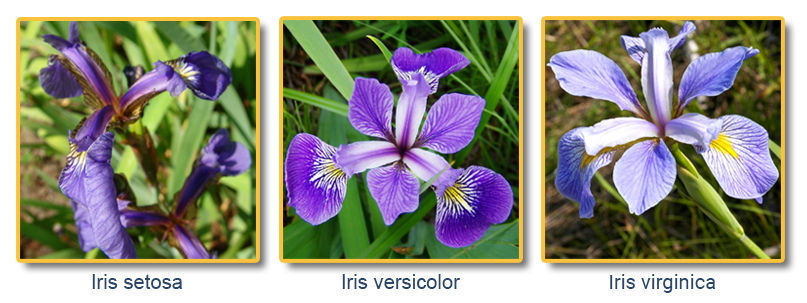

# A Comprehensive Analysis on Iris Dataset

The Iris dataset is a classic dataset in the field of machine learning, often used as a benchmark for classification models. The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The goal of the dataset is to classify the iris flowers into three species: setosa, versicolor, and virginica.

In this GitHub repository, we present a comprehensive analysis of the Iris dataset using various machine learning techniques. We explore the dataset through data visualization, statistical analysis, and feature engineering. We then train and evaluate several classification models on the dataset, including knn, logistic regression, decision trees, random forests, XGBoost and SVM. We also use cross-validation and hyperparameter tuning to optimize the performance of these models.

## 1. Loading Dataset

In [1]:
import warnings   
warnings.filterwarnings('ignore')  # hides all the warnings

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# store features in X and target variables in y
X = iris.data
y = iris.target

In [4]:
# feature names and target names
print(f"Feature names: {iris.feature_names}")
print(f"\nTarget names: {iris.target_names}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
# dimensions of dataset
print(f"Size of Feature matrix: {X.shape}")
print(f"\nSize of Target vector: {y.shape}")

Size of Feature matrix: (150, 4)

Size of Target vector: (150,)


In [6]:
# print target vector
# Here, iris species: 0 = setosa, 1 = versicolor, 2 = virginica
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. Converting into dataframe

* **Numpy**: Highly optimized library use for numerical computation

* **Pandas**: It is used for data manipulation and analysis

In [7]:
# importing important libraries
import pandas as pd
import numpy as np

In [8]:
# creating a dataframe
df = pd.DataFrame(data=np.c_[X, y], columns=iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 3. Exploratory Data Analysis

In [9]:
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# checking missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

We can see that no column has any missing value

In [13]:
# checking duplicates
data = df.drop_duplicates(subset='Species')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
50,7.0,3.2,4.7,1.4,1.0
100,6.3,3.3,6.0,2.5,2.0


We can see that there are only three unique species. Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not.

In [14]:
# getting frequency of each Iris species in target variable
df['Species'].value_counts()

2.0    50
1.0    50
0.0    50
Name: Species, dtype: int64

Here we can see that there is an equal distribution of iris flower species each of 50 samples which makes it a total of 150

## 4. Data Visualization

We will use the following two libraries for the data visualization.
* **Matplotlib**
* **Seaborn**

In [15]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

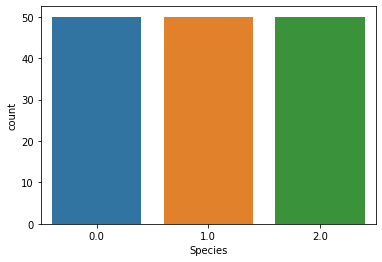

In [16]:
sns.countplot(x='Species', data=df)
plt.show()

As mentioned earlier, there is an equal distribution of iris flower species 

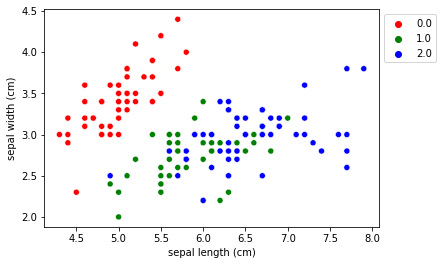

In [17]:
# comparing sepal length and sepal width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='Species', data=df, palette=['red','green','blue'])
 
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Placing Legend outside the Figure
 
plt.show()

From the above plot, we can infer that – 

* Species **Setosa** has smaller sepal lengths but larger sepal widths.
* **Versicolor** Species lies in the middle of the other two species in terms of sepal length and width
* Species **Virginica** has larger sepal lengths but smaller sepal widths.

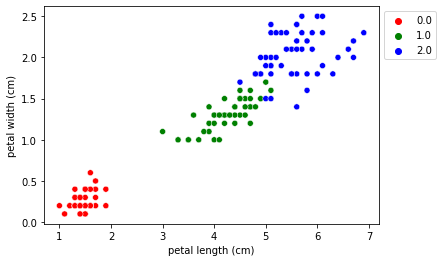

In [18]:
# comparing petal length and petal width
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='Species', data=df, palette=['red','green','blue'])
 
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Placing Legend outside the Figure
 
plt.show()

From the above plot, we can infer that – 

* Species **Setosa** has smaller petal lengths and widths.
* **Versicolor** Species lies in the middle of the other two species in terms of petal length and width
* Species **Virginica** has the largest of petal lengths and widths.

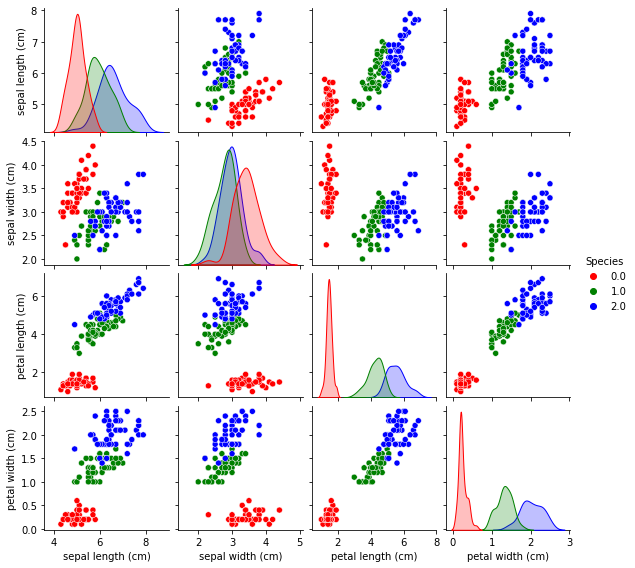

In [19]:
# plotting a pair plot
sns.pairplot(df, hue='Species', height=2, palette=['red','green','blue'])

The interpretations that can be drawn from above pair plot are-
* The histograms for sepal length and sepal width suggest that these variables are normally distributed, while the histograms for petal length and petal width suggest that these variables may be bimodal.
* The scatterplots in the upper triangle of the plot show the relationship between pairs of variables. For example, the scatterplot of sepal length versus sepal width suggests that there is no strong linear relationship between these variables, while the scatterplot of petal length versus petal width suggests a strong positive linear relationship.
* The scatterplots can also be used to identify patterns or clusters in the data. For example, the scatterplots of petal length versus petal width show distinct clusters for each of the three species of iris, which suggests that these two variables are good predictors of iris species.

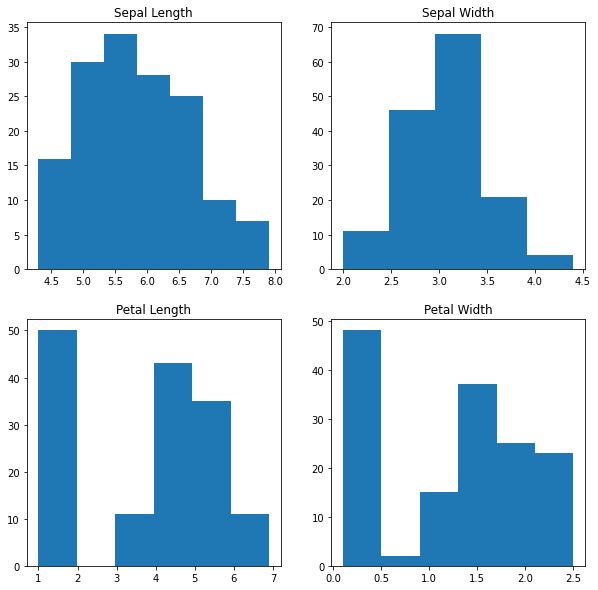

In [20]:
# plotting histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal length (cm)'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal width (cm)'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal length (cm)'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal width (cm)'], bins=6);

In plotting a histogram, the bins parameter determines the number of bins or intervals into which the data is divided for the purpose of visualization. Each bin represents a range of values, and the height of the bar in the histogram represents the frequency of values within that range.

The bins parameter is used to control the granularity of the histogram, or the level of detail with which the distribution of data is visualized. If the number of bins is too small, the histogram may be too coarse and fail to capture the nuances of the data. On the other hand, if the number of bins is too large, the histogram may become overly detailed and difficult to interpret.

**Interpretations:-**
* The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6 cms.
* The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5 cms.
* The highest frequency of the petal length is around 50 which is between 1 and 2 cms
* The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5 cms.

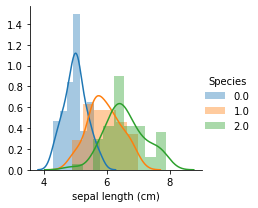

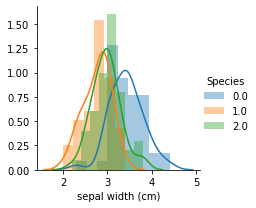

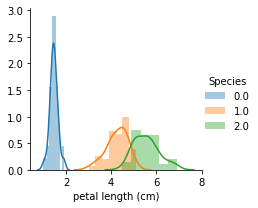

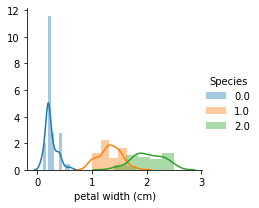

In [21]:
# histograms with distplot plot
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, 'sepal length (cm)').add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, 'sepal width (cm)').add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, 'petal length (cm)').add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, 'petal width (cm)').add_legend()
 
plt.show()

**Interpretations:-**
* In the case of Sepal Length and Sepal Width, there is a huge amount of overlapping.
* In the case of Petal Length and Petal Width, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

In [22]:
# correlation matrix
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


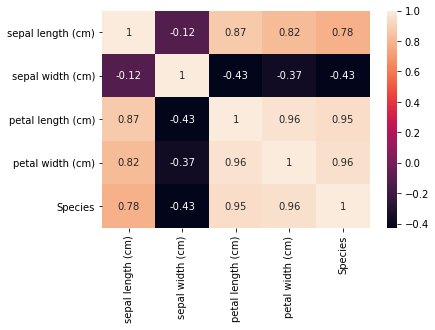

In [23]:
# correlation heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

These results suggest that there are strong relationships between the different variables in the given dataset, with petal length and petal width being highly correlated with each other, and sepal length being moderately correlated with both petal length and petal width. Sepal width, on the other hand, is weakly correlated with the other variables in the dataset.

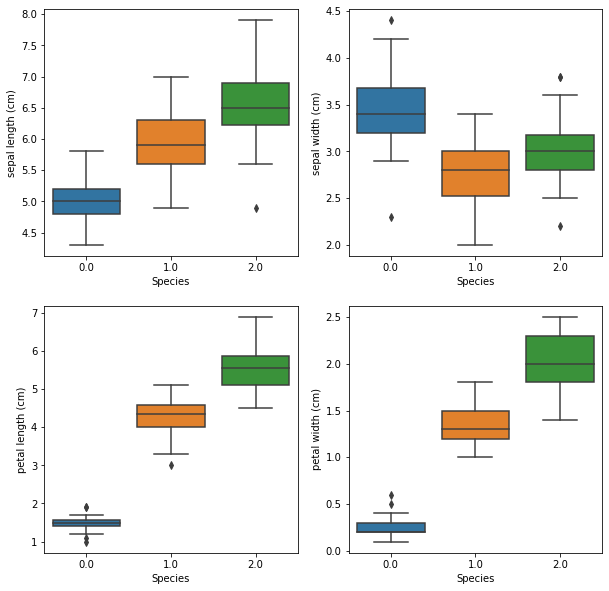

In [24]:
# box plots
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified grid position
Y = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i in range(len(Y)):
    plt.subplot(221 + i)
    sns.boxplot(x="Species", y=Y[i], data=df)

plt.show()

## 5. Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

## 6. Feature Engineering

**Standardization** is a common technique in feature engineering that involves transforming numerical data to have a standard mean and standard deviation. This is done in order to make the numerical features more comparable and easier to work with.

In standardization, the mean of the data is subtracted from each observation, and the result is divided by the standard deviation. This centers the data at 0 and scales it to have a standard deviation of 1. This can be expressed mathematically as:

z = (x - mu) / sigma

Where:

* x is the original feature value
* mu is the mean of the feature values
* sigma is the standard deviation of the feature values
* z is the standardized feature value

Standardization is often used as a preprocessing step before applying certain machine learning algorithms, such as those that are sensitive to the scale of the input features. It can also help to improve the performance and interpretability of the model.

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Principal Components Analysis (PCA)** is a technique used in data analysis and dimensionality reduction. The goal of PCA is to transform a large set of variables into a smaller set of uncorrelated variables, called principal components, while retaining as much of the original variance as possible.

The PCA algorithm works by finding the linear combinations of the original variables that explain the most variation in the data. These linear combinations, or principal components, are orthogonal to each other, meaning they are uncorrelated. The first principal component accounts for the largest amount of variation in the data, and each subsequent principal component accounts for the next largest amount of variation, subject to the constraint that it must be orthogonal to the previous principal components.

By reducing the number of variables, PCA can simplify the analysis and visualization of high-dimensional data, making it easier to identify patterns and relationships. It can also be used to identify which variables are most important in explaining the variation in the data, which can be useful in feature selection or feature engineering.

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
exp_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)
print(pca.n_components_)

[0.72911495 0.22681885 0.03892595 0.00514025]
4


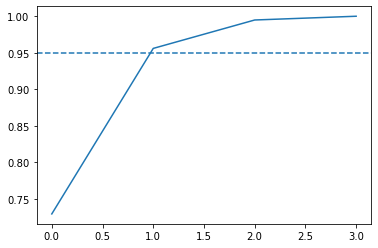

In [28]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(4), cum_exp_variance)
ax.axhline(y=0.95, linestyle='--')

We look at the **cumulative explained variance plot** to determine how many features are required to explain, say, about 95% of the variance. 

Here, we can see that the first two principal components explains about 95.22% of the variance.

(0.7249 + 0.2273 = 0.9522)

Hence, 2 is the appropriate number of components. We perform PCA with that 2 components, ideally reducing the dimensionality of our data.

In [29]:
# Applying PCA function

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 8. Understanding the Evaluation Metrics

Some commonly used evaluation metrics are:

**Accuracy:** This measures the proportion of correctly classified samples. It is a commonly used metric and is suitable when the classes are balanced. However, it can be misleading when the classes are imbalanced.

Accuracy = TP+TN/TP+FP+FN+TN

**Precision:** This measures the proportion of true positive predictions out of all positive predictions. It is useful when the goal is to minimize false positives.

Precision = TP/TP+FP

**Recall:** This measures the proportion of true positive predictions out of all actual positive samples. It is useful when the goal is to minimize false negatives.

Recall = TP/TP+FN

**F1-score:** This is the harmonic mean of precision and recall and is a good metric to use when there is an imbalance between the classes.

F1 Score = 2(Recall Precision) / (Recall + Precision)

For the Iris dataset, which is a balanced multiclass classification problem with three classes, accuracy is a suitable metric to use. However, it is also a good practice to report precision, recall, and F1-score to gain a more complete understanding of the performance of the classifier.



## 9. Applying the Algorithms

### 9.1 KNN

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# define the grid of hyperparameters to search over
knn_param_grid = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance']
}

# define the classifier
knn = KNeighborsClassifier() 

# perform grid cearch with cross-validation
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_test)
knn_accuracy = accuracy_score(knn_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {knn_grid.best_params_}")
print(f"Test set accuracy: {knn_accuracy}")
print(f"Classification Report: \n{classification_report(knn_pred, y_test)}")

Best hyperparameters: {'n_neighbors': 11, 'weights': 'uniform'}
Test set accuracy: 0.9333333333333333
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### 9.2 Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# define the grid of hyperparameters to search over
logreg_param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1', 'l2']
}

# define the classifier
logreg = LogisticRegression() 

# perform grid cearch with cross-validation
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_pred = logreg_grid.predict(X_test)
logreg_accuracy = accuracy_score(logreg_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {logreg_grid.best_params_}")
print(f"Test set accuracy: {logreg_accuracy}")
print(f"Classification Report: \n{classification_report(logreg_pred, y_test)}")

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Test set accuracy: 0.9
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### 9.3 Decision Tree

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# define the grid of hyperparameters to search over
tree_param_grid = {
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [1,2, 5, 10, 15]
}

# define the classifier
tree = DecisionTreeClassifier() 

# perform grid cearch with cross-validation
tree_grid = GridSearchCV(tree, tree_param_grid, cv=5)
tree_grid.fit(X_train, y_train)
tree_pred = tree_grid.predict(X_test)
tree_accuracy = accuracy_score(tree_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {tree_grid.best_params_}")
print(f"Test set accuracy: {tree_accuracy}")
print(f"Classification Report: \n{classification_report(tree_pred, y_test)}")

Best hyperparameters: {'max_depth': 7, 'min_samples_split': 10}
Test set accuracy: 0.9333333333333333
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.91      0.91        11
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 9.4 Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# define the grid of hyperparameters to search over
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15]
}

# define the classifier
rf = RandomForestClassifier()

# perform grid cearch with cross-validation
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(rf_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {rf_grid.best_params_}")
print(f"Test set accuracy: {rf_accuracy}")
print(f"Classification Report: \n{classification_report(rf_pred, y_test)}")

Best hyperparameters: {'max_depth': 9, 'min_samples_split': 10, 'n_estimators': 200}
Test set accuracy: 0.9666666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 9.5 xG boost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# define the grid of hyperparameters to search over
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# define the classifier
xgb = GradientBoostingClassifier()

# perform grid cearch with cross-validation
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_pred = xgb_grid.predict(X_test)
xgb_accuracy = accuracy_score(xgb_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {xgb_grid.best_params_}")
print(f"Test set accuracy: {xgb_accuracy}")
print(f"Classification Report: \n{classification_report(xgb_pred, y_test)}")

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Test set accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 9.6 Support Vector Machine

In [35]:
from sklearn.svm import SVC

# define the grid of hyperparameters to search over
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# define the classifier
svc = SVC()

# perform grid cearch with cross-validation
svc_grid = GridSearchCV(svc, svc_param_grid, cv=5)
svc_grid.fit(X_train, y_train)
svc_pred = svc_grid.predict(X_test)
svc_accuracy = accuracy_score(svc_pred, y_test)

# print the best hyperparameters and test set accuracy
print(f"Best hyperparameters: {svc_grid.best_params_}")
print(f"Test set accuracy: {svc_accuracy}")
print(f"Classification Report: \n{classification_report(svc_pred, y_test)}")

Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Test set accuracy: 0.9333333333333333
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.91      0.91        11
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [36]:
dataframe = pd.DataFrame(columns=['Algorithms', 'Accuracy'])
dataframe['Algorithms'] = ['K Nearest Neighbours', 'Logistic Regression', 'Decision Tree',
                          'Random Forest', 'xG boost', 'Support Vector Machine']
dataframe['Accuracy'] = [knn_accuracy, logreg_accuracy, tree_accuracy, 
                         rf_accuracy, xgb_accuracy, svc_accuracy]
dataframe

,Algorithms,Accuracy
0,K Nearest Neighbours,0.933333
1,Logistic Regression,0.900000
2,Decision Tree,0.933333
3,Random Forest,0.966667
4,xG boost,1.000000
5,Support Vector Machine,0.933333


It is possible to achieve an accuracy of 1 on the iris dataset, but it does not necessarily mean that the model is overfitting. The iris dataset is a small and well-known dataset, and many algorithms can achieve near-perfect or perfect accuracy on it.

Based on the evaluation results, the XGBoost model achieved the highest performance with an accuracy of 100%. However, all the models performed well, indicating that the iris dataset is a relatively easy dataset for classification.